In [1]:
import pandas as pd
import numpy as np
from IPython.display import Math #para escrever equações 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import seaborn as sns

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [3]:
from random import randint
from xmlrpc.client import Boolean
from tqdm import tqdm
import pandas as pd
import numpy as np
import quantecon as qe

import logging
log = logging.getLogger(__name__)
# logging.basicConfig(level=logging.DEBUG) 


In [4]:
RANDOM_SIZE   = 1000000
RANDOM_SIZE   = 2000
QTD_BINS      = 3
TEST_SIZE     = 0.05
RANDOM_STATE  = 2022
PREDITOR      = 'vegetable-oil_price_outcome'

- https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/__by_month_commodity_types.csv
- https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/__by_month_vegetable_oil.csv
- https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/__by_month_full.csv

# Mercado de Oleo

## Dataset Completo
USDA por comodity
USDA Agrupado por Oleo Vegetal
OECD Agrupado
FAO Index Price


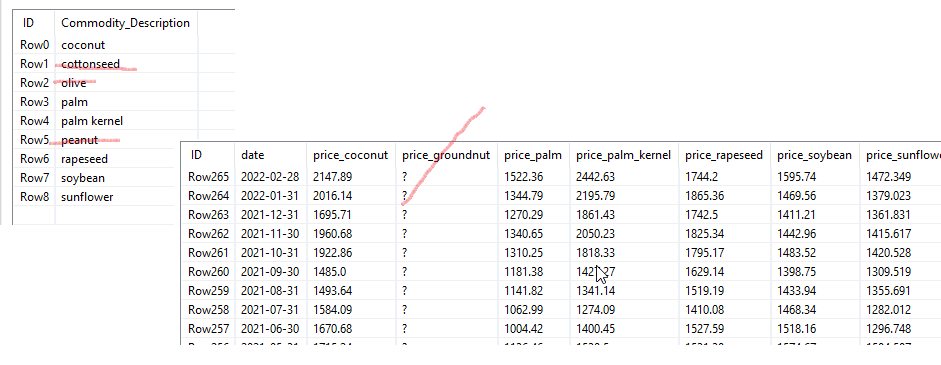

In [5]:

def get_dataset():
    df = pd.read_csv('https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/__by_month_full.csv')
    print(df.shape)
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values(by=['date'], ascending=[True], inplace=True)
    df.set_index(['date'], inplace=True)
    return df

%time df_full = get_dataset()
df_full.head()

(266, 139)
CPU times: total: 109 ms
Wall time: 234 ms


,reference,coconut_beginning-stocks,coconut_crush,coconut_domestic-consumption,coconut_ending-stocks,coconut_exports,coconut_feed-waste-dom-cons,coconut_food-use-dom-cons,coconut_imports,coconut_industrial-dom-cons,...,vegetable-oil_total-supply_usda,vegetable-oils_consumption_oecd,vegetable-oils_ending-stocks_oecd,vegetable-oils_exports_oecd,vegetable-oils_food-fat-availability_oecd,vegetable-oils_food_oecd,vegetable-oils_human-consumption-per-capita_oecd,vegetable-oils_imports_oecd,vegetable-oils_other-use_oecd,vegetable-oils_production_oecd
date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7273.770,844.920,2541.320,2.240,6179.990,1.020,2490.870,1088.770,7469.760
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7298.970,849.930,2562.660,2.240,6190.320,1.020,2504.980,1098.620,7494.420
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7324.160,854.950,2584.010,2.240,6200.660,1.020,2519.100,1108.460,7519.090
2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7349.360,859.960,2605.360,2.240,6211.000,1.030,2533.210,1118.310,7543.750
2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7374.550,864.970,2626.710,2.250,6221.340,1.030,2547.320,1128.150,7568.420


In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 2000-01-31 to 2022-02-28
Columns: 138 entries, reference to vegetable-oils_production_oecd
dtypes: float64(137), object(1)
memory usage: 288.9+ KB


In [7]:
df_full.dtypes

reference                                            object
coconut_beginning-stocks                            float64
coconut_crush                                       float64
coconut_domestic-consumption                        float64
coconut_ending-stocks                               float64
                                                     ...   
vegetable-oils_food_oecd                            float64
vegetable-oils_human-consumption-per-capita_oecd    float64
vegetable-oils_imports_oecd                         float64
vegetable-oils_other-use_oecd                       float64
vegetable-oils_production_oecd                      float64
Length: 138, dtype: object

In [8]:
features = [x for x in df_full.columns if ('exports' in x or 'production' in x or 'price' in x) and not ('olive' in x or 'cottonseed' in x) ]
prices = [x for x in df_full.columns if 'price' in x and 'groundnut' not in x  ]
print(len(features), features)
print(len(prices), prices)

26 ['coconut_exports', 'coconut_price', 'coconut_production', 'palm-kernel_exports', 'palm-kernel_price', 'palm-kernel_production', 'palm_exports', 'palm_price', 'palm_production', 'peanut_exports', 'peanut_price', 'peanut_production', 'rapeseed_exports', 'rapeseed_price', 'rapeseed_production', 'soybean_exports', 'soybean_price', 'soybean_production', 'sunflower_exports', 'sunflower_price', 'sunflower_production', 'vegetable-oil_exports_usda', 'vegetable-oil_price', 'vegetable-oil_production_usda', 'vegetable-oils_exports_oecd', 'vegetable-oils_production_oecd']
8 ['coconut_price', 'palm-kernel_price', 'palm_price', 'peanut_price', 'rapeseed_price', 'soybean_price', 'sunflower_price', 'vegetable-oil_price']


In [9]:
df = df_full[features]
print(df.shape)
df = df[df['sunflower_production'].notnull()]
df = df[df['sunflower_price'].notnull()]
print(df.shape)
df

(266, 26)
(234, 26)


,coconut_exports,coconut_price,coconut_production,palm-kernel_exports,palm-kernel_price,palm-kernel_production,palm_exports,palm_price,palm_production,peanut_exports,...,soybean_price,soybean_production,sunflower_exports,sunflower_price,sunflower_production,vegetable-oil_exports_usda,vegetable-oil_price,vegetable-oil_production_usda,vegetable-oils_exports_oecd,vegetable-oils_production_oecd
date,,,,,,,,,,,,,,,,,,,,,
2002-02-28,148.440,376.000,255.940,130.470,356.000,264.710,1527.920,352.980,2146.310,17.030,...,364.920,3204.320,166.180,578.000,620.920,3312.180,47.786,8559.630,2986.310,7954.130
2002-03-31,148.040,366.000,255.830,130.830,353.240,266.520,1543.880,359.000,2162.830,16.580,...,359.210,3222.400,168.850,557.000,625.580,3339.800,47.622,8591.720,3014.280,7983.170
2002-04-30,147.640,411.000,255.720,131.190,405.000,268.330,1559.830,360.070,2179.360,16.140,...,370.860,3240.470,171.530,552.000,630.250,3367.440,48.969,8623.810,3042.260,8012.210
2002-05-31,147.240,420.000,255.610,131.560,418.300,270.150,1575.790,384.910,2195.890,15.690,...,399.890,3258.550,174.200,574.000,634.920,3395.080,51.641,8655.950,3070.240,8041.250
2002-06-30,146.830,446.000,255.500,131.920,439.000,271.960,1591.750,426.130,2212.420,15.250,...,456.810,3276.620,176.880,595.000,639.580,3422.710,55.804,8688.040,3098.220,8070.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,157.080,1493.640,290.610,276.780,1341.140,716.470,4092.220,1141.820,6229.440,35.640,...,1433.940,6354.170,988.220,1355.691,1703.690,7821.270,165.862,18894.320,7325.470,18174.560
2021-09-30,158.080,1485.000,291.080,278.380,1427.270,718.600,4103.190,1181.380,6246.960,35.020,...,1398.750,6350.750,994.670,1309.519,1717.600,7837.790,168.571,18923.870,7328.510,18207.820
2021-10-31,159.080,1922.860,291.560,279.970,1818.330,720.740,4114.150,1310.250,6264.470,34.400,...,1483.520,6347.330,1001.110,1420.528,1731.510,7854.300,184.837,18953.420,7331.560,18241.070


In [10]:
df.describe()

,coconut_exports,coconut_price,coconut_production,palm-kernel_exports,palm-kernel_price,palm-kernel_production,palm_exports,palm_price,palm_production,peanut_exports,...,soybean_price,soybean_production,sunflower_exports,sunflower_price,sunflower_production,vegetable-oil_exports_usda,vegetable-oil_price,vegetable-oil_production_usda,vegetable-oils_exports_oecd,vegetable-oils_production_oecd
count,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,...,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000
mean,154.793,1037.208,277.760,233.840,956.092,523.365,3226.635,763.075,4406.418,19.901,...,882.535,4857.446,563.021,966.043,1174.819,5990.575,103.046,14277.728,5545.769,13471.372
std,10.334,412.612,12.313,41.691,378.930,139.269,805.918,244.906,1262.844,6.470,...,272.357,980.073,284.888,334.951,331.668,1329.965,32.741,3166.837,1307.176,3118.232
min,123.000,366.000,248.500,130.470,353.240,264.710,1527.920,352.980,2146.310,12.830,...,359.210,3204.320,166.180,543.000,620.920,3312.180,47.622,8559.630,2986.310,7954.130
25%,148.055,702.250,270.998,219.213,655.290,399.255,2515.020,577.495,3275.315,15.468,...,719.372,4057.825,329.412,719.643,886.732,5027.562,78.436,11538.903,4463.065,10815.903
50%,154.895,953.500,275.410,245.990,878.330,530.115,3399.860,732.000,4468.605,16.805,...,832.990,4667.785,493.780,856.470,1127.385,5927.510,97.910,14325.960,5663.720,13418.630
75%,160.400,1387.287,287.767,263.450,1232.705,642.967,4014.682,886.188,5503.118,23.133,...,1016.713,5831.602,867.900,1174.505,1528.378,7278.573,121.403,17158.577,6772.868,16394.708
max,177.920,2256.000,302.500,283.170,2307.630,725.000,4325.500,1377.220,6299.500,40.580,...,1574.670,6381.500,1122.670,2045.000,1761.580,7887.340,184.837,19012.500,7349.260,18307.580


## Correlação

Paired density and scatterplot matrix

https://seaborn.pydata.org/examples/pair_grid_with_kde.html

In [11]:
if False:
    %time
    sns.set_theme(style="white")

    g = sns.PairGrid(df, diag_sharey=False)
    g.map_upper(sns.scatterplot, s=15)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=2)

![Alt text](https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/images/Compare.png)

## Dendograma

In [12]:
if False:
    plt.figure(figsize=(25,10))
    dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))

    plt.title('Dendrogram')

    # plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    %time plt.show()

# Markov
Observaçoes:
- Sera que o outcome deveria ser calculado em funcao do dado? Não deveria ser uma referencia Exogena? Exemplos (Open Interest da soja eu tenho). No exemplo do VIRAL... ele pega o outcome como o volume de negocios.

In [13]:
!pip install --upgrade quantecon numba tqdm

In [14]:
df.tail()

,coconut_exports,coconut_price,coconut_production,palm-kernel_exports,palm-kernel_price,palm-kernel_production,palm_exports,palm_price,palm_production,peanut_exports,...,soybean_price,soybean_production,sunflower_exports,sunflower_price,sunflower_production,vegetable-oil_exports_usda,vegetable-oil_price,vegetable-oil_production_usda,vegetable-oils_exports_oecd,vegetable-oils_production_oecd
date,,,,,,,,,,,,,,,,,,,,,
2021-08-31,157.080,1493.640,290.610,276.780,1341.140,716.470,4092.220,1141.820,6229.440,35.640,...,1433.940,6354.170,988.220,1355.691,1703.690,7821.270,165.862,18894.320,7325.470,18174.560
2021-09-30,158.080,1485.000,291.080,278.380,1427.270,718.600,4103.190,1181.380,6246.960,35.020,...,1398.750,6350.750,994.670,1309.519,1717.600,7837.790,168.571,18923.870,7328.510,18207.820
2021-10-31,159.080,1922.860,291.560,279.970,1818.330,720.740,4114.150,1310.250,6264.470,34.400,...,1483.520,6347.330,1001.110,1420.528,1731.510,7854.300,184.837,18953.420,7331.560,18241.070
2021-11-30,160.080,1960.680,292.030,281.570,2050.230,722.870,4125.120,1340.650,6281.990,33.780,...,1442.960,6343.920,1007.560,1415.617,1745.420,7870.820,184.555,18982.970,7334.600,18274.330
2021-12-31,161.080,1695.710,292.500,283.170,1861.430,725.000,4136.080,1270.290,6299.500,33.170,...,1411.210,6340.500,1014.000,1361.831,1759.330,7887.340,178.505,19012.500,7337.650,18307.580


## Geração do Random Sets

In [15]:
def prepare_dataset(df: pd.DataFrame):
    df = df.copy()
    for col in df.columns:
        df[f'{col}_delta']    = df[col].diff()
        df[f'{col}_outcome']  = df[col].diff(-1) * -1
        df[f'{col}_mom']      = df[col].pct_change()

    columns = sorted(list(df.columns))
    return df[columns].reset_index()


df_m = prepare_dataset(df)
df_m.tail(10).T

,224,225,226,227,228,229,230,231,232,233
date,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,2021-06-30 00:00:00,2021-07-31 00:00:00,2021-08-31 00:00:00,2021-09-30 00:00:00,2021-10-31 00:00:00,2021-11-30 00:00:00,2021-12-31 00:00:00
coconut_exports,152.080,153.080,154.080,155.080,156.080,157.080,158.080,159.080,160.080,161.080
coconut_exports_delta,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
coconut_exports_mom,0.007,0.007,0.007,0.006,0.006,0.006,0.006,0.006,0.006,0.006
coconut_exports_outcome,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,NaN
...,...,...,...,...,...,...,...,...,...,...
vegetable-oils_exports_oecd_outcome,3.050,3.040,3.050,3.040,3.050,3.040,3.050,3.040,3.050,NaN
vegetable-oils_production_oecd,18008.290,18041.550,18074.800,18108.060,18141.310,18174.560,18207.820,18241.070,18274.330,18307.580
vegetable-oils_production_oecd_delta,33.250,33.260,33.250,33.260,33.250,33.250,33.260,33.250,33.260,33.250
vegetable-oils_production_oecd_mom,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002


In [16]:
df_m.tail()

,date,coconut_exports,coconut_exports_delta,coconut_exports_mom,coconut_exports_outcome,coconut_price,coconut_price_delta,coconut_price_mom,coconut_price_outcome,coconut_production,...,vegetable-oil_production_usda_mom,vegetable-oil_production_usda_outcome,vegetable-oils_exports_oecd,vegetable-oils_exports_oecd_delta,vegetable-oils_exports_oecd_mom,vegetable-oils_exports_oecd_outcome,vegetable-oils_production_oecd,vegetable-oils_production_oecd_delta,vegetable-oils_production_oecd_mom,vegetable-oils_production_oecd_outcome
229,2021-08-31,157.080,1.000,0.006,1.000,1493.640,-90.450,-0.057,-8.640,290.610,...,0.002,29.550,7325.470,3.050,0.000,3.040,18174.560,33.250,0.002,33.260
230,2021-09-30,158.080,1.000,0.006,1.000,1485.000,-8.640,-0.006,437.860,291.080,...,0.002,29.550,7328.510,3.040,0.000,3.050,18207.820,33.260,0.002,33.250
231,2021-10-31,159.080,1.000,0.006,1.000,1922.860,437.860,0.295,37.820,291.560,...,0.002,29.550,7331.560,3.050,0.000,3.040,18241.070,33.250,0.002,33.260
232,2021-11-30,160.080,1.000,0.006,1.000,1960.680,37.820,0.020,-264.970,292.030,...,0.002,29.530,7334.600,3.040,0.000,3.050,18274.330,33.260,0.002,33.250
233,2021-12-31,161.080,1.000,0.006,NaN,1695.710,-264.970,-0.135,NaN,292.500,...,0.002,NaN,7337.650,3.050,0.000,NaN,18307.580,33.250,0.002,NaN


In [17]:
def get_random_sets(input_dataframe: pd.DataFrame, 
                    size = 100000,
                    **kwargs):
    
    # take random sets of sequential rows 
    new_set = []

    # breakpoint()
    
    log.debug(f'AQUI:   {size}')
    for row_set in (tqdm(iterable = range(0, size), bar_format='{desc:<15}{percentage:3.0f}%|{bar:50}{r_bar}' ) ):
        
        # obtem de forma randomica uma amostra de n linhas do dataset
        # entre 3 e 18 meses
        row_quant     = randint(3, 18)
        row_start     = randint(0, len(input_dataframe) - row_quant)
        row_finish    = row_start + row_quant
        
        market_subset = input_dataframe.iloc[row_start:row_finish]

        # log.debug(f'AQUI:   {row_start} |{row_finish} | {market_subset.shape}')
        
        Close_Date    = max(market_subset['date'])
        

        if row_set%(size//5)==0:
            pass
            print(f'row_set: {row_set:<6} | row_quant: {row_quant:2} | rows: {row_start:>6}-{row_finish-1:<6} | market_subset: {str(market_subset.shape):^10} | Close_Date: {Close_Date:%m/%d/%Y}')
        
        ref = {}
        ref['Sequence_ID']  = [row_set]*len(market_subset)          # poderia ser 'row_quant' ao inves de 'len(market_subset)'
        ref['Close_Date']   = [Close_Date]*len(market_subset)
        ref['ref_date']   = market_subset['date']
        
        columns_ref = {}
        
        if 'columns' in kwargs and isinstance(kwargs['columns'], list):
            for _col in kwargs['columns']:
                if _col in input_dataframe.columns:
                    columns_ref[_col] = market_subset[_col]
                    columns_ref[f'{_col}_variation'] = market_subset[_col].pct_change()
                    
                    if 'outcomes' in kwargs and isinstance(kwargs['outcomes'], list) and _col in kwargs['outcomes']:
                        columns_ref[f'{_col}_outcome'] = market_subset[_col].diff(-1) * -1
            
        
        if 'bypass' in kwargs and isinstance(kwargs['bypass'], list):
            for _col in kwargs['bypass']:
                columns_ref[_col] = market_subset[_col]
               
        # columns_ref = dict( sorted(columns_ref.items(), key=lambda x: x[0].lower()) )
        
        #merge dictionaries
        ref = {**ref, **columns_ref}
        
        new_set.append(pd.DataFrame(ref))
        
    return new_set

# get_random_sets(df_m, RANDOM_SIZE)

In [18]:
%time my_set_case1 = get_random_sets(df.reset_index(), RANDOM_SIZE,columns=features,  outcomes=features, bypass=[])

                 0%|▎                                                 | 10/2000 [00:00<00:44, 45.14it/s]

row_set: 0      | row_quant:  6 | rows:    178-183    | market_subset:  (6, 27)   | Close_Date: 10/31/2017


                20%|██████████▏                                       | 408/2000 [00:06<00:23, 67.22it/s]

row_set: 400    | row_quant: 11 | rows:    160-170    | market_subset:  (11, 27)  | Close_Date: 09/30/2016


                41%|████████████████████▎                             | 814/2000 [00:12<00:18, 64.57it/s]

row_set: 800    | row_quant: 11 | rows:    161-171    | market_subset:  (11, 27)  | Close_Date: 10/31/2016


                61%|██████████████████████████████▎                   | 1213/2000 [00:18<00:11, 66.70it/s]

row_set: 1200   | row_quant:  5 | rows:     14-18     | market_subset:  (5, 27)   | Close_Date: 01/31/2004


                81%|████████████████████████████████████████▎         | 1612/2000 [00:25<00:05, 64.87it/s]

row_set: 1600   | row_quant:  9 | rows:     54-62     | market_subset:  (9, 27)   | Close_Date: 09/30/2007


               100%|██████████████████████████████████████████████████| 2000/2000 [00:31<00:00, 63.51it/s]

CPU times: total: 31.8 s
Wall time: 31.5 s


In [19]:
def convet_collection_to_dataframe(collection):
    """
    Concatena todas as colecoes
    Remove os np.inf e np.nan, gerados pelo pc_c
    """
    df_out = pd.concat(collection)
    
    log.debug(f'Before dropping NaNs: {df_out.shape}')
    df_out.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_out = df_out.dropna(how='any') 
    log.debug(f'After dropping NaNs: {df_out.shape}')
    return df_out

In [20]:
%time df1 = convet_collection_to_dataframe(my_set_case1)
df1

CPU times: total: 234 ms
Wall time: 236 ms


,Sequence_ID,Close_Date,ref_date,coconut_exports,coconut_exports_variation,coconut_exports_outcome,coconut_price,coconut_price_variation,coconut_price_outcome,coconut_production,...,vegetable-oil_price_outcome,vegetable-oil_production_usda,vegetable-oil_production_usda_variation,vegetable-oil_production_usda_outcome,vegetable-oils_exports_oecd,vegetable-oils_exports_oecd_variation,vegetable-oils_exports_oecd_outcome,vegetable-oils_production_oecd,vegetable-oils_production_oecd_variation,vegetable-oils_production_oecd_outcome
179,0,2017-10-31,2017-06-30,147.960,-0.001,-0.150,1869.760,0.088,-225.710,285.960,...,-0.814,17441.080,0.004,66.470,6824.410,0.002,12.130,16753.110,0.005,84.330
180,0,2017-10-31,2017-07-31,147.810,-0.001,-0.140,1644.050,-0.121,200.950,287.730,...,2.502,17507.550,0.004,66.470,6836.540,0.002,12.130,16837.440,0.005,84.330
181,0,2017-10-31,2017-08-31,147.670,-0.001,-0.150,1845.000,0.122,-244.050,289.500,...,4.674,17574.020,0.004,66.480,6848.670,0.002,12.130,16921.770,0.005,84.330
182,0,2017-10-31,2017-09-30,147.520,-0.001,-0.140,1600.950,-0.132,-116.180,291.270,...,-1.158,17640.500,0.004,66.480,6860.800,0.002,12.120,17006.100,0.005,84.330
180,1,2018-11-30,2017-07-31,147.810,-0.001,-0.140,1644.050,-0.121,200.950,287.730,...,2.502,17507.550,0.004,66.470,6836.540,0.002,12.130,16837.440,0.005,84.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,1999,2018-05-31,2017-12-31,147.080,-0.001,2.570,1450.660,-0.067,-56.800,296.580,...,0.289,17839.920,0.004,42.950,6897.180,0.002,37.670,17259.090,0.005,31.120
186,1999,2018-05-31,2018-01-31,149.650,0.017,2.570,1393.860,-0.039,-149.610,297.080,...,-2.651,17882.870,0.002,42.950,6934.850,0.005,37.680,17290.210,0.002,31.110
187,1999,2018-05-31,2018-02-28,152.220,0.017,2.570,1244.250,-0.107,-125.620,297.570,...,-0.246,17925.820,0.002,42.940,6972.530,0.005,37.670,17321.320,0.002,31.120
188,1999,2018-05-31,2018-03-31,154.790,0.017,2.570,1118.630,-0.101,12.550,298.060,...,-1.333,17968.760,0.002,42.980,7010.200,0.005,37.670,17352.440,0.002,31.110


In [21]:
outcomes = [x for x in df1.columns if 'outcome' in x  ]
outcomes

['coconut_exports_outcome',
 'coconut_price_outcome',
 'coconut_production_outcome',
 'palm-kernel_exports_outcome',
 'palm-kernel_price_outcome',
 'palm-kernel_production_outcome',
 'palm_exports_outcome',
 'palm_price_outcome',
 'palm_production_outcome',
 'peanut_exports_outcome',
 'peanut_price_outcome',
 'peanut_production_outcome',
 'rapeseed_exports_outcome',
 'rapeseed_price_outcome',
 'rapeseed_production_outcome',
 'soybean_exports_outcome',
 'soybean_price_outcome',
 'soybean_production_outcome',
 'sunflower_exports_outcome',
 'sunflower_price_outcome',
 'sunflower_production_outcome',
 'vegetable-oil_exports_usda_outcome',
 'vegetable-oil_price_outcome',
 'vegetable-oil_production_usda_outcome',
 'vegetable-oils_exports_oecd_outcome',
 'vegetable-oils_production_oecd_outcome']

## Divisao em Quantis

In [22]:
get_divison = lambda size: [item / size for item in list(range(size + 1))]
get_labels = lambda size, start=0: [f'{chr( (item % 26 + start) + 65  )}{ "" if item // 26 <= 0 else item // 26 }' for item in list(range(size))]
get_full = lambda size: [ (chr(i + 65), f'{j / size} < x <= { (j+1) / size}' ) for i , j in enumerate(range(size))]
get_bins = lambda _input_array, size:  np.round(np.linspace(_input_array.min(), _input_array.max(), size + 1), 6).tolist()


def read_kwarg_list(kwargs, name, _else_conditions = None):
    if name in kwargs and isinstance(kwargs[name], list):
        return kwargs[name]
    return _else_conditions

def read_kwarg_bool(kwargs, name):
    if name in kwargs and isinstance(kwargs[name], Boolean):
        return kwargs[name]
    return False
        

In [23]:
get_labels(3, 10)

['K', 'L', 'M']

In [24]:
get_labels(3)

['A', 'B', 'C']

In [25]:
def quantiles_v1(df: pd.DataFrame, labels: list):
    df    = df.copy()
    ref   = ''.join(labels).lower()
    size  = len(labels)

    columns_labels = []
    for col in df.columns:
        if 'variation' in col:
            column_name         = f'{col}_qcut'
            df[column_name]     = pd.qcut(df[col], q=size, labels = labels)
            columns_labels.append(column_name)

    equation = ' + '.join( [f'df["{col}"].astype(str)' for col in columns_labels] )
    df['event_pattern']  = eval(equation) 
    columns_labels.append('event_pattern')

    return df
    return df[['Sequence_ID','Close_Date'] + columns_labels]
    

In [26]:
df2 = quantiles_v1(df1, ['L','M','H'])
print(df2.shape)
df2.tail()

(16305, 108)


,Sequence_ID,Close_Date,ref_date,coconut_exports,coconut_exports_variation,coconut_exports_outcome,coconut_price,coconut_price_variation,coconut_price_outcome,coconut_production,...,soybean_production_variation_qcut,sunflower_exports_variation_qcut,sunflower_price_variation_qcut,sunflower_production_variation_qcut,vegetable-oil_exports_usda_variation_qcut,vegetable-oil_price_variation_qcut,vegetable-oil_production_usda_variation_qcut,vegetable-oils_exports_oecd_variation_qcut,vegetable-oils_production_oecd_variation_qcut,event_pattern
185,1999,2018-05-31,2017-12-31,147.080,-0.001,2.570,1450.660,-0.067,-56.800,296.580,...,L,L,M,L,L,L,M,L,H,MLHLLHLLHMMMLLMLLLLMLLLMLH
186,1999,2018-05-31,2018-01-31,149.650,0.017,2.570,1393.860,-0.039,-149.610,297.080,...,M,M,M,M,H,M,L,M,L,HLMHLMMHMMLMMLLMMMMMMHMLML
187,1999,2018-05-31,2018-02-28,152.220,0.017,2.570,1244.250,-0.107,-125.620,297.570,...,M,M,M,M,H,L,L,M,L,HLMHLMMMMMLLMLLMLMMMMHLLML
188,1999,2018-05-31,2018-03-31,154.790,0.017,2.570,1118.630,-0.101,12.550,298.060,...,M,M,M,M,H,M,L,M,L,HLMHLMMMMMMLMLLMMMMMMHMLML
189,1999,2018-05-31,2018-04-30,157.360,0.017,2.570,1131.180,0.011,-103.430,298.560,...,M,M,M,M,H,M,L,M,L,HMMHMMMMMMMLMMLMMMMMMHMLML


In [27]:
outcomes

['coconut_exports_outcome',
 'coconut_price_outcome',
 'coconut_production_outcome',
 'palm-kernel_exports_outcome',
 'palm-kernel_price_outcome',
 'palm-kernel_production_outcome',
 'palm_exports_outcome',
 'palm_price_outcome',
 'palm_production_outcome',
 'peanut_exports_outcome',
 'peanut_price_outcome',
 'peanut_production_outcome',
 'rapeseed_exports_outcome',
 'rapeseed_price_outcome',
 'rapeseed_production_outcome',
 'soybean_exports_outcome',
 'soybean_price_outcome',
 'soybean_production_outcome',
 'sunflower_exports_outcome',
 'sunflower_price_outcome',
 'sunflower_production_outcome',
 'vegetable-oil_exports_usda_outcome',
 'vegetable-oil_price_outcome',
 'vegetable-oil_production_usda_outcome',
 'vegetable-oils_exports_oecd_outcome',
 'vegetable-oils_production_oecd_outcome']

## Compressing

In [28]:
def compress_v1(input_dataframe: pd.DataFrame, **kwargs):
    columns         = read_kwarg_list(kwargs,'columns')
    outcomes        = read_kwarg_list(kwargs,'outcomes')
    
    if columns and 'event_pattern' in input_dataframe.columns:
        df_step1 = input_dataframe.groupby(columns)['event_pattern'].apply(lambda x: ','.join(x)).reset_index()
        
    if columns and outcomes:
        df_step2 = input_dataframe.groupby(columns)[outcomes].mean()
        
    compressed_set = pd.merge(df_step1, df_step2, on= columns, how='inner')
    
    return compressed_set

In [29]:
df3 = compress_v1(df2, columns = ['Sequence_ID', 'Close_Date'],  outcomes = outcomes)
print(df3.shape)
df3.tail()

(1940, 29)


,Sequence_ID,Close_Date,event_pattern,coconut_exports_outcome,coconut_price_outcome,coconut_production_outcome,palm-kernel_exports_outcome,palm-kernel_price_outcome,palm-kernel_production_outcome,palm_exports_outcome,...,soybean_price_outcome,soybean_production_outcome,sunflower_exports_outcome,sunflower_price_outcome,sunflower_production_outcome,vegetable-oil_exports_usda_outcome,vegetable-oil_price_outcome,vegetable-oil_production_usda_outcome,vegetable-oils_exports_oecd_outcome,vegetable-oils_production_oecd_outcome
1935,1995,2010-04-30,"LMHLMLMMMMMHHMLMMMMLLLMMHH,LHHLHLMHMLHHHMLMMMM...",-1.865,71.000,0.850,-0.540,63.525,1.095,6.975,...,-3.180,17.300,0.255,-12.000,-0.255,7.765,1.028,46.965,30.150,63.380
1936,1996,2010-02-28,"HLHMLMMLLMLLMLHHLHLMMMLHLM,HMHMMMMHLMLLMHHHHHM...",1.728,19.400,0.854,0.036,38.664,1.864,8.292,...,10.202,30.952,-0.096,27.800,0.860,18.984,2.812,61.470,13.514,47.504
1937,1997,2007-02-28,"LMLHMLLMLLLLHHLHMHMHMMHMLL,LMLHMLLMLLLLHHLHHHM...",-1.481,18.500,-1.008,2.249,10.300,1.320,8.440,...,17.460,16.204,-0.017,5.000,0.326,18.889,1.611,32.383,12.879,30.445
1938,1998,2003-10-31,"MHMHMHHHHHHHHHHMMLMHHHHHMH,MHMHHHHHHHHHHMHMMLM...",0.362,9.400,0.716,1.166,18.294,2.174,15.854,...,11.804,-0.452,2.526,4.000,7.610,25.914,1.259,48.166,16.014,42.308
1939,1999,2018-05-31,"MHHMLHLLHMMMLMMLMLLMMLLMLH,MLHMMHLLHMHMLHMLMLL...",1.088,-76.546,1.190,0.953,-8.689,3.443,8.792,...,-3.609,8.688,2.092,0.633,4.279,15.821,-0.484,55.782,23.740,60.142


In [30]:
df3.columns

Index(['Sequence_ID', 'Close_Date', 'event_pattern', 'coconut_exports_outcome',
       'coconut_price_outcome', 'coconut_production_outcome',
       'palm-kernel_exports_outcome', 'palm-kernel_price_outcome',
       'palm-kernel_production_outcome', 'palm_exports_outcome',
       'palm_price_outcome', 'palm_production_outcome',
       'peanut_exports_outcome', 'peanut_price_outcome',
       'peanut_production_outcome', 'rapeseed_exports_outcome',
       'rapeseed_price_outcome', 'rapeseed_production_outcome',
       'soybean_exports_outcome', 'soybean_price_outcome',
       'soybean_production_outcome', 'sunflower_exports_outcome',
       'sunflower_price_outcome', 'sunflower_production_outcome',
       'vegetable-oil_exports_usda_outcome', 'vegetable-oil_price_outcome',
       'vegetable-oil_production_usda_outcome',
       'vegetable-oils_exports_oecd_outcome',
       'vegetable-oils_production_oecd_outcome'],
      dtype='object')

## Simplificando o Dataset
A rigor a simplificaçao ocorre antes de *Directions*, pois dá para remover dados indesejados.

In [31]:
df3[outcomes].describe()

,coconut_exports_outcome,coconut_price_outcome,coconut_production_outcome,palm-kernel_exports_outcome,palm-kernel_price_outcome,palm-kernel_production_outcome,palm_exports_outcome,palm_price_outcome,palm_production_outcome,peanut_exports_outcome,...,soybean_price_outcome,soybean_production_outcome,sunflower_exports_outcome,sunflower_price_outcome,sunflower_production_outcome,vegetable-oil_exports_usda_outcome,vegetable-oil_price_outcome,vegetable-oil_production_usda_outcome,vegetable-oils_exports_oecd_outcome,vegetable-oils_production_oecd_outcome
count,1940.000,1940.000,1940.000,1940.000,1940.000,1940.000,1940.000,1940.000,1940.000,1940.000,...,1940.000,1940.000,1940.000,1940.000,1940.000,1940.000,1940.000,1940.000,1940.000,1940.000
mean,-0.035,4.490,0.153,0.608,2.823,1.957,10.981,1.733,17.881,0.127,...,1.620,13.627,3.371,1.540,4.285,18.831,0.247,45.321,19.236,45.032
std,1.444,54.456,0.955,1.187,55.954,1.497,13.150,29.624,12.860,0.288,...,28.954,11.552,6.921,42.777,7.414,17.833,3.826,20.857,14.193,24.147
min,-3.120,-331.000,-1.830,-2.650,-389.130,-2.120,-24.320,-192.577,-22.310,-0.953,...,-258.490,-16.860,-15.500,-273.750,-14.100,-28.230,-28.378,-9.220,-24.600,-17.340
25%,-0.948,-22.826,-0.455,-0.365,-24.496,1.235,4.677,-10.632,13.991,-0.039,...,-10.645,7.946,-0.333,-11.160,0.323,7.765,-1.333,32.142,11.967,31.124
50%,0.049,5.500,0.134,0.854,2.785,2.201,13.825,1.285,20.170,0.076,...,0.609,13.638,2.985,-0.500,4.461,19.604,0.094,47.361,21.617,44.632
75%,0.712,30.008,0.851,1.410,30.112,2.946,19.785,15.151,24.922,0.199,...,13.304,19.056,8.173,11.357,9.490,29.766,1.780,60.805,28.780,61.942
max,4.130,323.000,2.270,2.935,309.500,5.800,47.770,125.000,49.120,1.220,...,100.337,42.027,17.910,165.000,19.660,81.180,15.453,112.375,71.970,106.730


In [32]:
# df3[[x for x in df_full.columns if 'outcome' in x and 'prices' in x  ]].describe()

In [33]:
relevant_cut_off  = 1 #variacao maior que 1 ponto 
outcome_reference = PREDITOR

print(f'All available data: { df3.shape[0]}')
df4 = df3[ abs(df3[outcome_reference]) > relevant_cut_off ][:]
print(f'Relevant changes: { df4.shape[0]}')

All available data: 1940
Relevant changes: 1296


In [34]:
df4

,Sequence_ID,Close_Date,event_pattern,coconut_exports_outcome,coconut_price_outcome,coconut_production_outcome,palm-kernel_exports_outcome,palm-kernel_price_outcome,palm-kernel_production_outcome,palm_exports_outcome,...,soybean_price_outcome,soybean_production_outcome,sunflower_exports_outcome,sunflower_price_outcome,sunflower_production_outcome,vegetable-oil_exports_usda_outcome,vegetable-oil_price_outcome,vegetable-oil_production_usda_outcome,vegetable-oils_exports_oecd_outcome,vegetable-oils_production_oecd_outcome
0,0,2017-10-31,"MHHMLHLLHMMMLMMLMLLMMLLMLH,MLHMMHLLHMHMLHMLMLL...",-0.145,-96.248,1.770,0.133,97.007,4.360,-1.695,...,11.912,5.918,-3.000,2.615,1.933,-7.362,1.301,66.475,12.128,84.330
1,1,2018-11-30,"MLHMMHLLHMHMLHMLMLLMMLMMLH,MHHMHHLMHMMMLLMLHLL...",1.721,-55.299,0.892,1.373,-20.372,2.972,14.166,...,-6.649,10.108,4.701,-5.432,5.483,27.702,-1.254,50.302,29.690,47.745
2,2,2007-08-31,"LMLHMLLMLLHLHMLHMHMMMMMMLL,LHLHHLLHLLLLHHLHHHM...",0.599,28.400,1.446,1.224,34.641,2.867,23.469,...,30.708,6.984,-2.713,44.800,-2.445,16.742,4.010,41.284,28.161,44.309
3,3,2014-09-30,"MMLLHMLMMHLHLMMMMHHLHMLHMM,MHLLHMLMLHLHLMMMHHH...",0.106,23.138,-0.567,0.927,2.762,2.038,20.467,...,-11.910,34.918,3.168,-21.352,2.695,45.900,-1.026,60.914,29.476,62.208
5,5,2011-05-31,"LHHLHLLHMLHHHHLMHMMHLLHMHH,LHHLHLLHMLHHHHLMHMM...",0.037,97.500,-1.028,-0.392,59.057,2.458,15.815,...,10.723,2.003,11.270,33.848,13.135,19.523,1.422,49.785,24.447,49.638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,1993,2012-08-31,"MLLLLMMMMMHMHMMLMLHLHMLMMM,MLLLMMMMMMHMHLMLMLH...",0.434,-50.846,0.435,1.665,-28.078,2.960,20.511,...,-6.699,5.358,1.195,-11.304,-0.290,26.012,-1.365,36.822,23.759,37.188
1935,1995,2010-04-30,"LMHLMLMMMMMHHMLMMMMLLLMMHH,LHHLHLMHMLHHHMLMMMM...",-1.865,71.000,0.850,-0.540,63.525,1.095,6.975,...,-3.180,17.300,0.255,-12.000,-0.255,7.765,1.028,46.965,30.150,63.380
1936,1996,2010-02-28,"HLHMLMMLLMLLMLHHLHLMMMLHLM,HMHMMMMHLMLLMHHHHHM...",1.728,19.400,0.854,0.036,38.664,1.864,8.292,...,10.202,30.952,-0.096,27.800,0.860,18.984,2.812,61.470,13.514,47.504
1937,1997,2007-02-28,"LMLHMLLMLLLLHHLHMHMHMMHMLL,LMLHMLLMLLLLHHLHHHM...",-1.481,18.500,-1.008,2.249,10.300,1.320,8.440,...,17.460,16.204,-0.017,5.000,0.326,18.889,1.611,32.383,12.879,30.445


## Determinando vetores de direção


In [35]:
def directions(df: pd.DataFrame):
    df    = df.copy()

    for col in [x for x in df.columns if 'outcome' in x ]:
        column_name         = f'{col}_direction'
        df[column_name]     = df[col].apply(lambda x: 1 if x > 0 else 0 )

    columns_fixed   = list(df.columns[:4])
    columns_sort    = sorted(list(df.columns[4:]))
    return df[columns_fixed + columns_sort].sort_values(by = ['Close_Date'], ascending=[True])


In [36]:
#sem simplificacao
%time df5 = directions(df3)
df5

CPU times: total: 46.9 ms
Wall time: 45 ms


,Sequence_ID,Close_Date,event_pattern,coconut_exports_outcome,coconut_exports_outcome_direction,coconut_price_outcome,coconut_price_outcome_direction,coconut_production_outcome,coconut_production_outcome_direction,palm-kernel_exports_outcome,...,vegetable-oil_exports_usda_outcome,vegetable-oil_exports_usda_outcome_direction,vegetable-oil_price_outcome,vegetable-oil_price_outcome_direction,vegetable-oil_production_usda_outcome,vegetable-oil_production_usda_outcome_direction,vegetable-oils_exports_oecd_outcome,vegetable-oils_exports_oecd_outcome_direction,vegetable-oils_production_oecd_outcome,vegetable-oils_production_oecd_outcome_direction
66,67,2002-06-30,"MHMMHHHMHLLLLMLHHHHMMHHMHM,MMMMMHHHHLHLLMLHHHH...",-0.405,0,17.500,1,-0.110,0,0.365,...,27.635,1,3.418,1,32.115,1,27.980,1,29.040,1
601,616,2002-08-31,"MMMMMHHHHLHLLMLHHHHHMHHMHM,MHMMHHHHHLHLLHLHHHH...",-0.605,0,11.500,1,-0.165,0,0.540,...,41.450,1,4.003,1,48.150,1,41.965,1,43.560,1
672,689,2003-01-31,"MMMMMHHHHLHLLMLHHHHHMHHMHM,MHMMHHHHHLHLLHLHHHH...",-0.820,0,24.667,1,-0.020,0,1.230,...,73.110,1,4.227,1,90.963,1,70.620,1,81.863,1
192,201,2003-02-28,"LMMMMHHHHLHLLHLHHHHHHHHHHH,LHMHHHHHHLHLLHLHHHH...",-0.445,0,17.000,1,0.490,1,1.890,...,81.180,1,1.353,1,112.375,1,71.970,1,100.385,1
1018,1050,2003-02-28,"MHMMHHHHHLHLLHLHHHHHMHHMHM,LMMMMHHHHLHLLHLHHHH...",-0.563,0,10.333,1,0.253,1,1.500,...,72.543,1,2.183,1,96.320,1,66.630,1,86.283,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,663,2021-11-30,"LHMLMLLHLHMMMMMMHLLHLLHLLL,LHMLHLLHLHLMMMMMMLL...",-0.575,0,167.385,1,-0.140,0,-0.855,...,-15.100,0,8.654,1,2.015,1,11.645,1,18.945,1
1589,1637,2021-11-30,LHMLHLLHLHLMMMMMMLLMLLMLLL,-0.580,0,250.590,1,-0.140,0,-0.860,...,-15.110,0,15.453,1,2.010,1,11.650,1,18.940,1
613,629,2021-11-30,LHMLHLLHLHLMMMMMMLLMLLMLLL,-0.580,0,250.590,1,-0.140,0,-0.860,...,-15.110,0,15.453,1,2.010,1,11.650,1,18.940,1
966,997,2021-11-30,LHMLHLLHLHLMMMMMMLLMLLMLLL,-0.580,0,250.590,1,-0.140,0,-0.860,...,-15.110,0,15.453,1,2.010,1,11.650,1,18.940,1


## Split Train/Test

O Shuffle esta desativado. Não sera realizado embaralhamento de serie temporal, para evitar o erro de prever o passado com dados do futuro.

In [37]:
feature_directions = ['event_pattern'] + [x for x in df5.columns if 'direction' in x ]

In [38]:
X = df5[ feature_directions ]
y = df5[[PREDITOR]]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=False)
print(f'X_train: {X_train.shape} | X_test: {X_test.shape} | y_train: {y_train.shape} | y_test: {y_test.shape} ')

X_train: (1843, 27) | X_test: (97, 27) | y_train: (1843, 1) | y_test: (97, 1) 


In [40]:
X_train

,event_pattern,coconut_exports_outcome_direction,coconut_price_outcome_direction,coconut_production_outcome_direction,palm-kernel_exports_outcome_direction,palm-kernel_price_outcome_direction,palm-kernel_production_outcome_direction,palm_exports_outcome_direction,palm_price_outcome_direction,palm_production_outcome_direction,...,soybean_price_outcome_direction,soybean_production_outcome_direction,sunflower_exports_outcome_direction,sunflower_price_outcome_direction,sunflower_production_outcome_direction,vegetable-oil_exports_usda_outcome_direction,vegetable-oil_price_outcome_direction,vegetable-oil_production_usda_outcome_direction,vegetable-oils_exports_oecd_outcome_direction,vegetable-oils_production_oecd_outcome_direction
66,"MHMMHHHMHLLLLMLHHHHMMHHMHM,MMMMMHHHHLHLLMLHHHH...",0,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
601,"MMMMMHHHHLHLLMLHHHHHMHHMHM,MHMMHHHHHLHLLHLHHHH...",0,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
672,"MMMMMHHHHLHLLMLHHHHHMHHMHM,MHMMHHHHHLHLLHLHHHH...",0,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
192,"LMMMMHHHHLHLLHLHHHHHHHHHHH,LHMHHHHHHLHLLHLHHHH...",0,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
1018,"MHMMHHHHHLHLLHLHHHHHMHHMHM,LMMMMHHHHLHLLHLHHHH...",0,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,"LMLLLLLHLMMHMMLHLMHMMLMLLL,LMLLLLLLLMMHMMLHMMH...",0,1,0,0,1,0,0,1,0,...,1,1,1,1,1,0,1,1,0,1
250,LMMLLLLLLHHMMHMMMLLMLLLLLL,0,1,0,0,1,0,0,1,1,...,1,1,0,1,0,0,1,1,1,1
826,"LLMLLLLLLHHMMLMMLLLHLLLLLL,LMMLLLLLLHHMMLMMLLL...",0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,1
1905,"LMLLMLLMLMMHMHLHLMMMMLMLLL,LMLLLLLMLMMHMMLHMMM...",0,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,1,1,1,1


In [41]:
print(X_train.shape, "Metade de linhas:", X_train.shape[0]/2)
print('=='*80)
print('Vou usar a referencia de "sunflower_production_outcome_direction" pois ele tem aproximadamente metade do shape e por ser o influenciado de mercado. ')
print('=='*80)

X_train[[x for x in df5.columns if 'direction' in x ]].sum()

(1843, 27) Metade de linhas: 921.5
Vou usar a referencia de "sunflower_production_outcome_direction" pois ele tem aproximadamente metade do shape e por ser o influenciado de mercado. 


coconut_exports_outcome_direction                   1006
coconut_price_outcome_direction                      996
coconut_production_outcome_direction                1012
palm-kernel_exports_outcome_direction               1341
palm-kernel_price_outcome_direction                  956
palm-kernel_production_outcome_direction            1656
palm_exports_outcome_direction                      1583
palm_price_outcome_direction                         923
palm_production_outcome_direction                   1662
peanut_exports_outcome_direction                    1134
peanut_price_outcome_direction                       931
peanut_production_outcome_direction                 1131
rapeseed_exports_outcome_direction                  1567
rapeseed_price_outcome_direction                     982
rapeseed_production_outcome_direction               1637
soybean_exports_outcome_direction                   1061
soybean_price_outcome_direction                      907
soybean_production_outcome_dire

In [42]:
direction_reference = 'sunflower_production_outcome_direction'
df6_pos_case1 = X_train.loc[X_train[direction_reference] > 0]
df6_neg_case1 = X_train.loc[X_train[direction_reference] <= 0]
print(f'df6_pos: {df6_pos_case1.shape} | df6_neg: {df6_neg_case1.shape}')

df6_pos: (1481, 27) | df6_neg: (362, 27)


## Unique Patterns

In [43]:
X_train_case1 = X_train.copy()

In [44]:
def get_unique_patterns_V1(input_array: np.ndarray, **kwargs):
    """ 
    Aqui o 'get_labels' nao deve fazer parte... pois os unique patterns pode estar agrupado. Ex. AAA, ABC, etc
    """
    flat_list = [ item.split(',') for item in input_array ]
    unique_patterns = ','.join(str(r) for v in flat_list for r in v)
    unique_patterns = sorted(list( set( unique_patterns.split(',') ) ))
    return unique_patterns

In [45]:
# flat_list = [ item.split(',') for item in X_train['event_pattern'].values ]
# unique_patterns = ','.join(str(r) for v in flat_list for r in v)
# unique_patterns = sorted(list( set( unique_patterns.split(',') ) ))
# unique_patterns

In [46]:
unique_patterns = get_unique_patterns_V1(X_train_case1['event_pattern'].values)
print(len(unique_patterns), unique_patterns[:3])

207 ['HHHHHHHHHLLLLHHHHHLHLHHHHH', 'HHHHHHHHHLLLLLHHMHLLLHMHHH', 'HHHHHHHHHLLLLMHHMHLHLHMHHH']


## Matriz de Markov

Matriz estocastica
- cada elemento da matriz é positivo
- a somatoria de cada linha é 1

In [47]:
def build_transition_grid_v1(input_dataframe: pd.DataFrame, unique_patterns):
    # log.debug(f'unique_patterns ==> {unique_patterns}')
    
    # build the markov transition grid

    patterns = []
    counts = []
    counts_fk = {}
    
    # de
    for from_event in unique_patterns:
        # para
        
        for to_event in unique_patterns:
            
            pattern = from_event + ',' + to_event # MMM,MlM
            

            ids_matches = input_dataframe[input_dataframe['event_pattern'].str.contains(pattern)]
            
            
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['event_pattern'].values)
                found = Event_Pattern.count(pattern)
                
#             log.debug(f'pattern => {pattern} | ids_matches: {len(ids_matches)} | found: {found} ')
            patterns.append(pattern)
            counts.append(found)
            
            counts_fk[pattern] = f'{len(ids_matches)}|{found}'
    
    # log.debug(f'patterns: {patterns}')
    # log.debug(f'counts: {counts}')
    # log.debug(counts_fk)

    # create to/from grid
    grid_Df = pd.DataFrame({'pairs':patterns, 'counts': counts})
    
    # return grid_Df

    ## Warning
    # grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',').str
    
    grid_Df[['x', 'y']] = grid_Df['pairs'].str.split(',', n=1, expand=True)
    
    # return grid_Df

    grid_Df = grid_Df.pivot(index='x', columns='y', values='counts')
    
    # return grid_Df

    # log.debug(f'Antes Columns :{grid_Df.columns}')
    grid_Df.columns= [col for col in grid_Df.columns]
    # log.debug(f'Depois Columns :{grid_Df.columns}')
    
    # return grid_Df
   

    # replace all NaN with zeros
    grid_Df.fillna(0, inplace=True)
    
    grid_Df['soma'] = grid_Df.sum(axis=1)
    
    # return grid_Df

    # grid_Df.rowSums(transition_dataframe) 
    # grid_Df = grid_Df / grid_Df['soma']
    
    for col in grid_Df.columns:
        grid_Df[col] = grid_Df[col]/grid_Df['soma']
        
        
    del grid_Df['soma']

    return grid_Df

In [48]:
%time grid_pos = build_transition_grid_v1(df6_pos_case1, unique_patterns) 
grid_pos.to_excel('grid_case1_pos.xlsx')
grid_pos

CPU times: total: 1min 5s
Wall time: 1min 5s


,HHHHHHHHHLLLLHHHHHLHLHHHHH,HHHHHHHHHLLLLLHHMHLLLHMHHH,HHHHHHHHHLLLLMHHMHLHLHMHHH,HHHHHHHMHLLLLLHHLHLLLHMHHH,HHHMHHHHHLHHLHHLHLLHLMHMHH,HHHMHHHHHLHHLHMLHLLHLMHMHM,HHHMHHHMHLHHLHHLHLLHLMHMHM,HHHMHHHMHLLHLLHLHLLLLMMMHH,HHHMHMMHLMHLMMHHMHLHMMHHLM,HHHMHMMHLMLLMHHHHHMHMMHHLM,...,MMMHHHHMHHHHHMHMHLMMHHHHMH,MMMHHLHHLHLLMHMHHHLHLHHMHM,MMMHLLHLLHLLMLMHLHLLLHLMHM,MMMHLLHLLHLLMMMHMHLLLHLMHM,MMMHMLHLLHLLMLMHLHLLLHLMHM,MMMHMLHLLHLLMLMHMHLLLHLMMM,MMMHMLHLLHLLMMMHLHLMLHLMHM,MMMHMLHMLHLLMLMHMHLHLHMMMM,MMMMMHHHHLHLLMLHHHHHMHHMHM,MMMMMHHMHLLLLLLHLHHLMHMMHM
x,,,,,,,,,,,,,,,,,,,,,
HHHHHHHHHLLLLHHHHHLHLHHHHH,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
HHHHHHHHHLLLLLHHMHLLLHMHHH,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
HHHHHHHHHLLLLMHHMHLHLHMHHH,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
HHHHHHHMHLLLLLHHLHLLLHMHHH,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
HHHMHHHHHLHHLHHLHLLHLMHMHH,0.000,0.000,0.000,0.000,0.444,0.000,0.556,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMMHMLHLLHLLMLMHMHLLLHLMMM,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
MMMHMLHLLHLLMMMHLHLMLHLMHM,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
MMMHMLHMLHLLMLMHMHLHLHMMMM,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000


In [49]:
%time grid_neg = build_transition_grid_v1(df6_neg_case1, unique_patterns)
grid_neg.to_excel('grid_case1_neg.xlsx')
grid_neg

CPU times: total: 35.1 s
Wall time: 36.5 s


,HHHHHHHHHLLLLHHHHHLHLHHHHH,HHHHHHHHHLLLLLHHMHLLLHMHHH,HHHHHHHHHLLLLMHHMHLHLHMHHH,HHHHHHHMHLLLLLHHLHLLLHMHHH,HHHMHHHHHLHHLHHLHLLHLMHMHH,HHHMHHHHHLHHLHMLHLLHLMHMHM,HHHMHHHMHLHHLHHLHLLHLMHMHM,HHHMHHHMHLLHLLHLHLLLLMMMHH,HHHMHMMHLMHLMMHHMHLHMMHHLM,HHHMHMMHLMLLMHHHHHMHMMHHLM,...,MMMHHHHMHHHHHMHMHLMMHHHHMH,MMMHHLHHLHLLMHMHHHLHLHHMHM,MMMHLLHLLHLLMLMHLHLLLHLMHM,MMMHLLHLLHLLMMMHMHLLLHLMHM,MMMHMLHLLHLLMLMHLHLLLHLMHM,MMMHMLHLLHLLMLMHMHLLLHLMMM,MMMHMLHLLHLLMMMHLHLMLHLMHM,MMMHMLHMLHLLMLMHMHLHLHMMMM,MMMMMHHHHLHLLMLHHHHHMHHMHM,MMMMMHHMHLLLLLLHLHHLMHMMHM
x,,,,,,,,,,,,,,,,,,,,,
HHHHHHHHHLLLLHHHHHLHLHHHHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HHHHHHHHHLLLLLHHMHLLLHMHHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HHHHHHHHHLLLLMHHMHLHLHMHHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HHHHHHHMHLLLLLHHLHLLLHMHHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HHHMHHHHHLHHLHHLHLLHLMHMHH,0.000,0.000,0.000,0.000,0.535,0.000,0.465,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMMHMLHLLHLLMLMHMHLLLHLMMM,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
MMMHMLHLLHLLMMMHLHLMLHLMHM,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
MMMHMLHMLHLLMLMHMHLHLHMMMM,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000


# Markov 2
-Tentativa de segregar os patterns em:
- product_variation
- exports_variation
- price variation

Para ter padroes menores.

## Geração do Random Sets

In [50]:
%time my_set_case2 = get_random_sets(df.reset_index(), RANDOM_SIZE,columns=features,  outcomes=features, bypass=[])

                 0%|▏                                                 | 7/2000 [00:00<00:33, 60.34it/s]

row_set: 0      | row_quant:  8 | rows:    199-206    | market_subset:  (8, 27)   | Close_Date: 09/30/2019


                21%|██████████▎                                       | 412/2000 [00:06<00:29, 54.13it/s]

row_set: 400    | row_quant: 14 | rows:    156-169    | market_subset:  (14, 27)  | Close_Date: 08/31/2016


                40%|████████████████████                              | 804/2000 [00:12<00:18, 65.34it/s]

row_set: 800    | row_quant:  3 | rows:    210-212    | market_subset:  (3, 27)   | Close_Date: 03/31/2020


                61%|██████████████████████████████▎                   | 1212/2000 [00:19<00:13, 59.10it/s]

row_set: 1200   | row_quant: 17 | rows:    153-169    | market_subset:  (17, 27)  | Close_Date: 08/31/2016


                81%|████████████████████████████████████████▎         | 1613/2000 [00:26<00:05, 65.82it/s]

row_set: 1600   | row_quant:  7 | rows:     23-29     | market_subset:  (7, 27)   | Close_Date: 12/31/2004


               100%|██████████████████████████████████████████████████| 2000/2000 [00:31<00:00, 62.66it/s]

CPU times: total: 31.8 s
Wall time: 31.9 s


In [51]:
%time df1 = convet_collection_to_dataframe(my_set_case2)
df1

CPU times: total: 250 ms
Wall time: 254 ms


,Sequence_ID,Close_Date,ref_date,coconut_exports,coconut_exports_variation,coconut_exports_outcome,coconut_price,coconut_price_variation,coconut_price_outcome,coconut_production,...,vegetable-oil_price_outcome,vegetable-oil_production_usda,vegetable-oil_production_usda_variation,vegetable-oil_production_usda_outcome,vegetable-oils_exports_oecd,vegetable-oils_exports_oecd_variation,vegetable-oils_exports_oecd_outcome,vegetable-oils_production_oecd,vegetable-oils_production_oecd_variation,vegetable-oils_production_oecd_outcome
200,0,2019-09-30,2019-03-31,172.440,-0.010,-1.830,678.560,-0.045,-9.930,299.000,...,0.698,18424.940,0.001,23.190,7302.280,-0.002,-15.660,17644.660,0.000,4.060
201,0,2019-09-30,2019-04-30,170.610,-0.011,-1.830,668.630,-0.015,-7.460,297.830,...,-0.611,18448.130,0.001,23.210,7286.620,-0.002,-15.660,17648.720,0.000,4.050
202,0,2019-09-30,2019-05-31,168.780,-0.011,-1.820,661.170,-0.011,-25.570,296.670,...,-1.039,18471.340,0.001,23.210,7270.960,-0.002,-15.660,17652.770,0.000,4.060
203,0,2019-09-30,2019-06-30,166.960,-0.011,-1.830,635.600,-0.039,21.710,295.500,...,0.628,18494.550,0.001,23.200,7255.300,-0.002,-15.650,17656.830,0.000,4.060
204,0,2019-09-30,2019-07-31,165.130,-0.011,-1.820,657.310,0.034,61.970,294.330,...,4.499,18517.750,0.001,23.210,7239.650,-0.002,-15.660,17660.890,0.000,4.060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1999,2015-02-28,2014-09-30,161.190,0.001,0.190,1193.410,0.005,-44.710,273.460,...,1.540,15983.130,0.003,53.330,6359.500,0.006,36.570,14987.440,0.004,62.330
147,1999,2015-02-28,2014-10-31,161.380,0.001,0.180,1148.700,-0.037,42.930,273.360,...,0.760,16036.460,0.003,53.310,6396.070,0.006,36.560,15049.770,0.004,62.320
148,1999,2015-02-28,2014-11-30,161.560,0.001,0.190,1191.630,0.037,20.510,273.260,...,-2.959,16089.770,0.003,53.320,6432.630,0.006,36.570,15112.090,0.004,62.330
149,1999,2015-02-28,2014-12-31,161.750,0.001,-2.520,1212.140,0.017,-66.430,273.170,...,-2.892,16143.090,0.003,-9.230,6469.200,0.006,-24.600,15174.420,0.004,-17.330


In [52]:
outcomes = [x for x in df1.columns if 'outcome' in x  ]
outcomes

['coconut_exports_outcome',
 'coconut_price_outcome',
 'coconut_production_outcome',
 'palm-kernel_exports_outcome',
 'palm-kernel_price_outcome',
 'palm-kernel_production_outcome',
 'palm_exports_outcome',
 'palm_price_outcome',
 'palm_production_outcome',
 'peanut_exports_outcome',
 'peanut_price_outcome',
 'peanut_production_outcome',
 'rapeseed_exports_outcome',
 'rapeseed_price_outcome',
 'rapeseed_production_outcome',
 'soybean_exports_outcome',
 'soybean_price_outcome',
 'soybean_production_outcome',
 'sunflower_exports_outcome',
 'sunflower_price_outcome',
 'sunflower_production_outcome',
 'vegetable-oil_exports_usda_outcome',
 'vegetable-oil_price_outcome',
 'vegetable-oil_production_usda_outcome',
 'vegetable-oils_exports_oecd_outcome',
 'vegetable-oils_production_oecd_outcome']

## Divisao em Quantis

Processo de Discretização em 3

In [53]:
def quantiles_v2(df: pd.DataFrame, size = 3):
    df    = df.copy()

    columns_production  = []
    columns_exports     = []
    columns_prices      = []
    
    for i, col in enumerate(df.columns):
        column_name         = f'{col}_qcut'
        
        if 'production_variation' in col:
            labels = get_labels(size, 1*size)
            
            df[column_name]     = pd.qcut(df[col], q=size, labels = labels)
            columns_production.append(column_name)
            
        elif 'exports_variation' in col:
            labels = get_labels(size, 3*size)
            df[column_name]     = pd.qcut(df[col], q=size, labels = labels)
            columns_exports.append(column_name)            
            
        elif 'price_variation' in col:
            labels = get_labels(size, 5*size)
            df[column_name]     = pd.qcut(df[col], q=size, labels = labels)
            columns_prices.append(column_name)  
            
    def get_equation(columns):
        return ' + '.join( [f'df["{col}"].astype(str)' for col in columns] )
        
    df['event_pattern_production']  = eval(get_equation(columns_production)) 
    df['event_pattern_exports']     = eval(get_equation(columns_exports)) 
    df['event_pattern_prices']      = eval(get_equation(columns_prices)) 
    
    columns_fixed   = list(df.columns[:4])
    columns_sort    = sorted(list(df.columns[4:-3]))
    columns_event   = sorted(list(df.columns[-3:]))
    
    columns_production.append('event_pattern')

    return df[columns_fixed + columns_event+columns_sort].sort_values(by = ['Close_Date'], ascending=[False])
    return df
    return df[['Sequence_ID','Close_Date'] + columns_production]
    

In [54]:
df2 = quantiles_v2(df1, size=QTD_BINS)
print(df2.shape)
df2.tail()

(16612, 106)


,Sequence_ID,Close_Date,ref_date,coconut_exports,event_pattern_exports,event_pattern_prices,event_pattern_production,coconut_exports_outcome,coconut_exports_variation,coconut_exports_variation_qcut,...,vegetable-oil_price_variation_qcut,vegetable-oil_production_usda,vegetable-oil_production_usda_outcome,vegetable-oil_production_usda_variation,vegetable-oils_exports_oecd,vegetable-oils_exports_oecd_outcome,vegetable-oils_exports_oecd_variation,vegetable-oils_production_oecd,vegetable-oils_production_oecd_outcome,vegetable-oils_production_oecd_variation
4,768,2002-08-31,2002-06-30,146.830,KKLJJLL,RRRRRRRR,EFFDDFE,-0.800,-0.003,K,...,R,8688.040,64.210,0.004,3098.220,55.950,0.009,8070.290,58.080,0.004
3,768,2002-08-31,2002-05-31,147.240,KKLJJLL,QQRRQRRR,EFFDDFE,-0.410,-0.003,K,...,R,8655.950,32.090,0.004,3070.240,27.980,0.009,8041.250,29.040,0.004
2,768,2002-08-31,2002-04-30,147.640,KKLJJLL,RRQPQRQR,EFFDDFE,-0.400,-0.003,K,...,R,8623.810,32.140,0.004,3042.260,27.980,0.009,8012.210,29.040,0.004
2,1523,2002-05-31,2002-04-30,147.640,KKLJJLL,RRQPQRQR,EFFDDFE,-0.400,-0.003,K,...,R,8623.810,32.140,0.004,3042.260,27.980,0.009,8012.210,29.040,0.004
1,1447,2002-04-30,2002-03-31,148.040,KKLJJLL,PQQPPPPQ,EFFDDFF,-0.400,-0.003,K,...,Q,8591.720,32.090,0.004,3014.280,27.980,0.009,7983.170,29.040,0.004


## Compressing

In [55]:
def compress_v2(df: pd.DataFrame, **kwargs):
    columns         = read_kwarg_list(kwargs,'columns')
    outcomes        = read_kwarg_list(kwargs,'outcomes')
    
    event_patterns = [x for x in df.columns if 'event_pattern' in x  ]

    if columns and len(event_patterns) >= 1:
        #Nao pode usar o set... pois precisa-se da repeticao para compararcao entre fors
        # da funcao build_transition_grid_v2
        df_step1 = df.groupby(columns)[event_patterns].\
                    agg(lambda x: ','.join( list(  set(x) ) ) )
#         df_step1 = df.groupby(columns)[event_patterns].\
#                     agg(lambda x: list( set(x) ) ) 
        
    if columns and outcomes:
        df_step2 = df.groupby(columns)[outcomes].mean()
        
    compressed_set = pd.merge(df_step1, df_step2, on=columns, how='inner')
    
    agrupador = 'events_pattern'
    
    compressed_set[agrupador] = compressed_set[event_patterns].agg(','.join, axis=1)
          
    array1 = np.array(list(compressed_set.columns))
    array2 = np.array(event_patterns + [agrupador])
    delta = np.setdiff1d(array1, array2, assume_unique=True)

    return compressed_set[ [agrupador] + list(delta)]

In [56]:
df3 = compress_v2(df2, columns = ['Sequence_ID', 'Close_Date'],  outcomes = outcomes)
print(df3.shape)
df3.tail()

(1961, 27)


,,events_pattern,coconut_exports_outcome,coconut_price_outcome,coconut_production_outcome,palm-kernel_exports_outcome,palm-kernel_price_outcome,palm-kernel_production_outcome,palm_exports_outcome,palm_price_outcome,palm_production_outcome,...,soybean_price_outcome,soybean_production_outcome,sunflower_exports_outcome,sunflower_price_outcome,sunflower_production_outcome,vegetable-oil_exports_usda_outcome,vegetable-oil_price_outcome,vegetable-oil_production_usda_outcome,vegetable-oils_exports_oecd_outcome,vegetable-oils_production_oecd_outcome
Sequence_ID,Close_Date,,,,,,,,,,,,,,,,,,,,,
1995,2015-03-31,"JJJJJJK,QRQPPPPQ,PQQPPPPP,EDDEDEE,DDDEDEE",-2.520,-27.515,-0.375,-1.505,5.160,-2.115,-24.320,-10.390,-22.305,...,-23.325,13.175,5.080,-33.080,3.440,-28.225,-1.193,-9.210,-24.595,-17.335
1996,2012-06-30,"LLLJJLJ,KJKKLJL,LLKJJLJ,RRRPQQQR,QQQPQQQR,PQQR...",0.431,-62.083,0.090,1.285,-56.058,2.917,19.962,-13.720,24.500,...,-11.454,4.157,3.497,-22.403,2.729,25.237,-2.127,39.358,23.675,39.008
1997,2003-09-30,"KLLLLKK,JLLJJLL,KLLLLKL,RQRRRQRR,PPPRPPPP,PPPR...",0.361,-7.875,0.715,1.166,-7.797,2.174,15.855,-5.650,16.062,...,2.162,-0.451,2.529,-8.375,7.611,25.919,-0.623,48.166,16.012,42.307
1998,2008-11-30,"JKKLLJL,JLKLLJL,RRRQRRRR,PPPRPPPP,QQPRPPPP,QQP...",-3.118,-56.600,-0.375,1.409,-76.368,1.896,17.472,-54.090,21.174,...,-45.456,-16.854,7.090,-87.400,11.347,1.534,-7.207,30.640,18.456,33.101
1999,2015-02-28,"KLLLKLJ,JJJJJJK,KLLKKLJ,KLLKJLJ,PPQQPPPP,PQQPR...",-0.586,-13.531,-0.176,1.364,-7.704,0.620,13.920,-18.664,7.521,...,-19.260,33.586,-0.200,-11.863,-2.356,35.317,-2.207,35.450,19.090,39.567


In [57]:
df3.columns

Index(['events_pattern', 'coconut_exports_outcome', 'coconut_price_outcome',
       'coconut_production_outcome', 'palm-kernel_exports_outcome',
       'palm-kernel_price_outcome', 'palm-kernel_production_outcome',
       'palm_exports_outcome', 'palm_price_outcome', 'palm_production_outcome',
       'peanut_exports_outcome', 'peanut_price_outcome',
       'peanut_production_outcome', 'rapeseed_exports_outcome',
       'rapeseed_price_outcome', 'rapeseed_production_outcome',
       'soybean_exports_outcome', 'soybean_price_outcome',
       'soybean_production_outcome', 'sunflower_exports_outcome',
       'sunflower_price_outcome', 'sunflower_production_outcome',
       'vegetable-oil_exports_usda_outcome', 'vegetable-oil_price_outcome',
       'vegetable-oil_production_usda_outcome',
       'vegetable-oils_exports_oecd_outcome',
       'vegetable-oils_production_oecd_outcome'],
      dtype='object')

## Simplificando o Dataset

In [58]:
df3[outcomes].describe()

,coconut_exports_outcome,coconut_price_outcome,coconut_production_outcome,palm-kernel_exports_outcome,palm-kernel_price_outcome,palm-kernel_production_outcome,palm_exports_outcome,palm_price_outcome,palm_production_outcome,peanut_exports_outcome,...,soybean_price_outcome,soybean_production_outcome,sunflower_exports_outcome,sunflower_price_outcome,sunflower_production_outcome,vegetable-oil_exports_usda_outcome,vegetable-oil_price_outcome,vegetable-oil_production_usda_outcome,vegetable-oils_exports_oecd_outcome,vegetable-oils_production_oecd_outcome
count,1961.000,1961.000,1961.000,1961.000,1961.000,1961.000,1961.000,1961.000,1961.000,1961.000,...,1961.000,1961.000,1961.000,1961.000,1961.000,1961.000,1961.000,1961.000,1961.000,1961.000
mean,-0.007,7.661,0.121,0.566,4.111,1.876,10.362,3.390,17.097,0.141,...,3.016,14.590,3.130,3.654,4.070,18.693,0.444,45.039,18.554,44.396
std,1.471,54.434,0.955,1.219,56.940,1.573,13.767,29.245,13.457,0.324,...,27.286,11.560,7.330,39.616,7.729,18.882,3.762,22.303,15.023,25.107
min,-3.120,-294.000,-1.830,-2.650,-336.930,-2.120,-24.320,-193.730,-22.310,-1.530,...,-193.555,-16.860,-15.500,-258.000,-14.100,-28.225,-24.195,-9.230,-24.600,-17.335
25%,-0.941,-18.400,-0.475,-0.437,-24.211,1.098,3.249,-10.181,13.078,-0.034,...,-10.063,9.338,-0.334,-9.755,0.540,7.762,-1.267,30.645,11.646,31.115
50%,-0.031,6.222,0.044,0.720,4.534,2.175,12.539,1.388,19.650,0.077,...,1.574,14.079,2.600,0.000,3.997,19.606,0.167,47.641,20.538,42.599
75%,0.703,32.001,0.850,1.409,30.557,2.895,20.257,15.201,24.500,0.204,...,14.705,19.278,8.183,12.390,8.953,30.608,1.855,61.416,28.131,61.940
max,4.130,323.000,2.270,2.933,309.500,9.430,79.680,125.000,82.180,1.220,...,101.620,71.850,17.910,157.000,26.270,136.430,15.453,176.590,127.930,158.470


In [59]:
relevant_cut_off  = 1 #variacao maior que 1 ponto 
outcome_reference = PREDITOR

print(f'All available data: { df3.shape[0]}')
df4 = df3[ abs(df3[outcome_reference]) > relevant_cut_off ][:]
print(f'Relevant changes: { df4.shape[0]}')

All available data: 1961
Relevant changes: 1287


In [60]:
df4

,,events_pattern,coconut_exports_outcome,coconut_price_outcome,coconut_production_outcome,palm-kernel_exports_outcome,palm-kernel_price_outcome,palm-kernel_production_outcome,palm_exports_outcome,palm_price_outcome,palm_production_outcome,...,soybean_price_outcome,soybean_production_outcome,sunflower_exports_outcome,sunflower_price_outcome,sunflower_production_outcome,vegetable-oil_exports_usda_outcome,vegetable-oil_price_outcome,vegetable-oil_production_usda_outcome,vegetable-oils_exports_oecd_outcome,vegetable-oils_production_oecd_outcome
Sequence_ID,Close_Date,,,,,,,,,,,,,,,,,,,,,
1,2006-09-30,"JLJJLLK,QPQPRQRR,QQRRQRPR,QQQPRRRQ,RQRRQQRR,PP...",-2.173,5.667,-1.827,2.590,-7.738,0.805,3.432,6.453,11.090,...,10.292,19.278,0.882,10.500,1.250,19.603,1.091,29.420,7.783,25.823
2,2018-10-31,"LLKKKKK,QPQPPQPP,EEEDDEE",2.570,-66.880,0.490,1.930,-71.140,2.340,21.370,-15.350,25.230,...,-2.470,12.010,8.200,-15.910,7.100,43.610,-1.006,42.950,37.670,31.120
3,2016-11-30,"LKLKKJL,RRRRRRQR,PPPPRRQP,QQRPRQRQ,EFFFDEF",1.443,-7.197,0.557,0.487,29.750,4.207,35.950,-1.363,44.480,...,20.230,15.017,17.910,14.217,19.660,52.953,1.258,84.150,48.133,106.723
4,2011-01-31,"JJKJLJK,JJKJLKK,RRRRRRRR,RRRRRRQR,RRQRQRRR,FDE...",-1.412,173.600,0.396,-0.504,193.582,1.424,9.094,71.968,20.830,...,73.622,13.628,2.900,83.600,2.958,10.586,10.536,47.644,28.780,60.082
7,2011-02-28,"LKKJKLJ,JJKJLJK,LJKKLJL,JJKJLKK,LKKKKLK,QQQRQQ...",-1.164,101.800,0.548,-0.453,103.541,1.400,8.533,37.592,20.268,...,28.499,16.369,1.979,52.249,2.010,10.892,4.912,49.027,27.387,59.416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2010-11-30,"JJKJLKK,RRRRRRRR,RRQRQRRR,FDEFDED",-1.870,114.000,0.847,-0.540,153.333,1.097,6.970,62.543,20.653,...,78.023,17.300,0.257,122.333,-0.257,7.763,10.688,46.970,30.147,63.380
1995,2015-03-31,"JJJJJJK,QRQPPPPQ,PQQPPPPP,EDDEDEE,DDDEDEE",-2.520,-27.515,-0.375,-1.505,5.160,-2.115,-24.320,-10.390,-22.305,...,-23.325,13.175,5.080,-33.080,3.440,-28.225,-1.193,-9.210,-24.595,-17.335
1996,2012-06-30,"LLLJJLJ,KJKKLJL,LLKJJLJ,RRRPQQQR,QQQPQQQR,PQQR...",0.431,-62.083,0.090,1.285,-56.058,2.917,19.962,-13.720,24.500,...,-11.454,4.157,3.497,-22.403,2.729,25.237,-2.127,39.358,23.675,39.008


## Determinando vetores de direção

In [61]:
#sem simplificacao
%time df5 = directions(df3)
df5

CPU times: total: 46.9 ms
Wall time: 43.2 ms


,,events_pattern,coconut_exports_outcome,coconut_price_outcome,coconut_production_outcome,coconut_exports_outcome_direction,coconut_price_outcome_direction,coconut_production_outcome_direction,palm-kernel_exports_outcome,palm-kernel_exports_outcome_direction,palm-kernel_price_outcome,...,vegetable-oil_exports_usda_outcome,vegetable-oil_exports_usda_outcome_direction,vegetable-oil_price_outcome,vegetable-oil_price_outcome_direction,vegetable-oil_production_usda_outcome,vegetable-oil_production_usda_outcome_direction,vegetable-oils_exports_oecd_outcome,vegetable-oils_exports_oecd_outcome_direction,vegetable-oils_production_oecd_outcome,vegetable-oils_production_oecd_outcome_direction
Sequence_ID,Close_Date,,,,,,,,,,,,,,,,,,,,,
1447,2002-04-30,"KKLJJLL,PQQPPPPQ,EFFDDFF",-0.400,45.000,-0.110,0,1,0,0.360,1,51.760,...,27.640,1,1.347,1,32.090,1,27.980,1,29.040,1
1523,2002-05-31,"KKLJJLL,RRQPQRQR,EFFDDFE",-0.400,9.000,-0.110,0,1,0,0.370,1,13.300,...,27.640,1,2.672,1,32.140,1,27.980,1,29.040,1
1555,2002-08-31,"KKLJJLL,RRRRRRRR,QQRRQRRR,EFFDDFE",-0.605,11.500,-0.165,0,1,0,0.540,1,7.530,...,41.450,1,4.003,1,48.150,1,41.965,1,43.560,1
325,2002-08-31,"KKLJJLL,RRRRRRRR,EFFDDFE",-0.800,-3.000,-0.220,0,0,0,0.720,1,-5.640,...,55.270,1,3.843,1,64.210,1,55.950,1,58.080,1
768,2002-08-31,"KKLJJLL,RRRRRRRR,QQRRQRRR,RRQPQRQR,EFFDDFE",-0.537,10.667,-0.147,0,1,0,0.483,1,9.453,...,36.847,1,3.559,1,42.813,1,37.303,1,38.720,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,2021-11-30,"KJJLKKJ,JJJLKKJ,RQRQQRRR,PPRRRRRR,RRRPQQQQ,RRR...",-0.578,120.160,-0.140,0,1,0,-0.855,0,97.388,...,-15.105,0,7.176,1,2.020,1,11.648,1,18.945,1
1205,2021-11-30,"JJJLKKJ,RRRPQQQQ,EDDEEDD",-0.580,250.590,-0.140,0,1,0,-0.860,0,267.570,...,-15.110,0,15.453,1,2.010,1,11.650,1,18.940,1
537,2021-11-30,"JJJLKKJ,RRRPQQQQ,RRRQRRRR,RQRQQRRR,EDDEEDD",-0.577,129.217,-0.140,0,1,0,-0.857,0,111.437,...,-15.103,0,7.734,1,2.017,1,11.647,1,18.943,1


## Split Train/Test

O Shuffle esta desativado. Não sera realizado embaralhamento de serie temporal, para evitar o erro de prever o passado com dados do futuro.

In [62]:
event_patterns = [x for x in df5.columns if 'events_pattern' in x  ]

feature_directions = event_patterns + [x for x in df5.columns if 'direction' in x ]
feature_directions

['events_pattern',
 'coconut_exports_outcome_direction',
 'coconut_price_outcome_direction',
 'coconut_production_outcome_direction',
 'palm-kernel_exports_outcome_direction',
 'palm-kernel_price_outcome_direction',
 'palm-kernel_production_outcome_direction',
 'palm_exports_outcome_direction',
 'palm_price_outcome_direction',
 'palm_production_outcome_direction',
 'peanut_exports_outcome_direction',
 'peanut_price_outcome_direction',
 'peanut_production_outcome_direction',
 'rapeseed_exports_outcome_direction',
 'rapeseed_price_outcome_direction',
 'rapeseed_production_outcome_direction',
 'soybean_exports_outcome_direction',
 'soybean_price_outcome_direction',
 'soybean_production_outcome_direction',
 'sunflower_exports_outcome_direction',
 'sunflower_price_outcome_direction',
 'sunflower_production_outcome_direction',
 'vegetable-oil_exports_usda_outcome_direction',
 'vegetable-oil_price_outcome_direction',
 'vegetable-oil_production_usda_outcome_direction',
 'vegetable-oils_exports

In [63]:
X = df5[ feature_directions ]
y = df5[[PREDITOR]]


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=False)
print(f'X_train: {X_train.shape} | X_test: {X_test.shape} | y_train: {y_train.shape} | y_test: {y_test.shape} ')

X_train: (1862, 27) | X_test: (99, 27) | y_train: (1862, 1) | y_test: (99, 1) 


In [65]:
X_train.sort_values(by=['Close_Date'], ascending=[False]).head()

,,events_pattern,coconut_exports_outcome_direction,coconut_price_outcome_direction,coconut_production_outcome_direction,palm-kernel_exports_outcome_direction,palm-kernel_price_outcome_direction,palm-kernel_production_outcome_direction,palm_exports_outcome_direction,palm_price_outcome_direction,palm_production_outcome_direction,...,soybean_price_outcome_direction,soybean_production_outcome_direction,sunflower_exports_outcome_direction,sunflower_price_outcome_direction,sunflower_production_outcome_direction,vegetable-oil_exports_usda_outcome_direction,vegetable-oil_price_outcome_direction,vegetable-oil_production_usda_outcome_direction,vegetable-oils_exports_oecd_outcome_direction,vegetable-oils_production_oecd_outcome_direction
Sequence_ID,Close_Date,,,,,,,,,,,,,,,,,,,,,
847,2020-09-30,"KJJLKKJ,JJJLKKJ,JJJKKLK,QPPRRQQP,RRRQRRRR,RRRR...",0,1,0,0,1,0,0,1,0,...,1,1,0,1,0,0,1,1,1,1
1536,2020-09-30,"KJJLKKJ,JJJLKKJ,QPPRRQQP,RRRQRRRR,RRRRRRRR,QPP...",0,1,0,0,1,0,0,1,1,...,1,1,0,1,0,0,1,1,1,1
81,2020-09-30,"KJJLKKJ,JJJLKKJ,QPPRRQQP,RRRQRRRR,RRRRRRRR,QRP...",0,1,0,0,1,0,0,1,1,...,1,1,0,1,0,0,1,1,1,1
1485,2020-09-30,"KJJLKKJ,JJJLKKJ,JJJKKLL,JJJKKLK,QPPRRQQP,QQQRQ...",0,1,0,0,1,0,0,1,0,...,1,1,0,1,0,0,1,1,1,1
70,2020-09-30,"KJJLKKJ,JJJLKKJ,JJJKKLK,QPPRRQQP,RRRQRRRR,RRRR...",0,1,0,0,1,0,0,1,0,...,1,1,0,1,0,0,1,1,1,1


In [66]:
X_test.sort_values(by=['Close_Date'], ascending=[False])

,,events_pattern,coconut_exports_outcome_direction,coconut_price_outcome_direction,coconut_production_outcome_direction,palm-kernel_exports_outcome_direction,palm-kernel_price_outcome_direction,palm-kernel_production_outcome_direction,palm_exports_outcome_direction,palm_price_outcome_direction,palm_production_outcome_direction,...,soybean_price_outcome_direction,soybean_production_outcome_direction,sunflower_exports_outcome_direction,sunflower_price_outcome_direction,sunflower_production_outcome_direction,vegetable-oil_exports_usda_outcome_direction,vegetable-oil_price_outcome_direction,vegetable-oil_production_usda_outcome_direction,vegetable-oils_exports_oecd_outcome_direction,vegetable-oils_production_oecd_outcome_direction
Sequence_ID,Close_Date,,,,,,,,,,,,,,,,,,,,,
59,2021-12-31,"JJJLKKJ,RRRPQQQQ,EDDEEDD",0,1,0,0,1,0,0,1,1,...,1,1,0,1,0,0,1,1,1,1
832,2021-12-31,"JJJLKKJ,RRRPQQQQ,EDDEEDD",0,1,0,0,1,0,0,1,1,...,1,1,0,1,0,0,1,1,1,1
537,2021-11-30,"JJJLKKJ,RRRPQQQQ,RRRQRRRR,RQRQQRRR,EDDEEDD",0,1,0,0,1,0,0,1,1,...,1,1,0,1,0,0,1,1,1,1
1205,2021-11-30,"JJJLKKJ,RRRPQQQQ,EDDEEDD",0,1,0,0,1,0,0,1,1,...,1,1,0,1,0,0,1,1,1,1
1960,2021-11-30,"KJJLKKJ,JJJLKKJ,RQRQQRRR,PPRRRRRR,RRRPQQQQ,RRR...",0,1,0,0,1,0,0,1,1,...,1,1,0,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,2020-10-31,"KJJLKKJ,JJJLKKJ,JJJKKLL,JJJKKLK,QPPRRQQP,RRRQR...",0,1,0,0,1,0,0,1,0,...,1,1,0,1,0,0,1,1,1,1
656,2020-10-31,"KJJLKKJ,JJJLKKJ,JJJKKLK,QPPRRQQP,RRRQRRRR,RRRR...",0,1,0,0,0,0,0,1,1,...,1,1,0,1,0,0,1,1,1,1
971,2020-10-31,"KJJLKKJ,JJJLKKJ,RRRRRRRR,RQRQQRRR,PPRRRRRR,RRR...",0,1,0,0,1,0,0,1,1,...,1,1,0,1,0,0,1,1,1,1


In [67]:
print(X_train.shape, "Metade de linhas:", X_train.shape[0]/2)
print('=='*80)
print('Vou usar a referencia de "sunflower_production_outcome_direction" pois ele tem aproximadamente metade do shape e por ser o influenciado de mercado. ')
print('=='*80)

X_train[[x for x in df5.columns if 'direction' in x ]].sum()

(1862, 27) Metade de linhas: 931.0
Vou usar a referencia de "sunflower_production_outcome_direction" pois ele tem aproximadamente metade do shape e por ser o influenciado de mercado. 


coconut_exports_outcome_direction                    959
coconut_price_outcome_direction                     1006
coconut_production_outcome_direction                 992
palm-kernel_exports_outcome_direction               1325
palm-kernel_price_outcome_direction                  978
palm-kernel_production_outcome_direction            1625
palm_exports_outcome_direction                      1552
palm_price_outcome_direction                         956
palm_production_outcome_direction                   1643
peanut_exports_outcome_direction                    1154
peanut_price_outcome_direction                       964
peanut_production_outcome_direction                 1137
rapeseed_exports_outcome_direction                  1590
rapeseed_price_outcome_direction                     993
rapeseed_production_outcome_direction               1645
soybean_exports_outcome_direction                   1125
soybean_price_outcome_direction                      951
soybean_production_outcome_dire

In [68]:
direction_reference = 'sunflower_production_outcome_direction'
df6_pos = X_train.loc[X_train[direction_reference] > 0]
df6_neg = X_train.loc[X_train[direction_reference] <= 0]
print(f'df6_pos: {df6_pos.shape} | df6_neg: {df6_neg.shape}')

df6_pos: (1518, 27) | df6_neg: (344, 27)


## Unique Patterns

In [69]:
def get_unique_patterns_V2(input_array: np.ndarray, **kwargs):
    """ 
    Aqui o 'get_labels' nao deve fazer parte... pois os unique patterns pode estar agrupado. Ex. AAA, ABC, etc
    """
    unique_patterns = []
    for i in range(len(input_array[0])):

        flat_list = [ item[i].split(',') for item in input_array ]
        temp_patterns = ','.join(str(r) for v in flat_list for r in v)
        unique_patterns += temp_patterns.split(',')
                
    unique_patterns = sorted(list( set(unique_patterns ) ))
    return unique_patterns

In [70]:
# flat_list = [ item[0].split(',') for item in X_train[event_patterns].values ]
# flat_list
# # unique_patterns = ','.join(str(r) for v in flat_list for r in v)
# # unique_patterns = sorted(list( set( unique_patterns.split(',') ) ))
# unique_patterns

In [71]:
unique_patterns = get_unique_patterns_V2(X_train[event_patterns].values)
print(len(unique_patterns), unique_patterns[194:])

236 ['RPQPQQQQ', 'RQPPQQPQ', 'RQPRRQQQ', 'RQQPRRRR', 'RQQQQPQQ', 'RQQRQRQR', 'RQQRRPQQ', 'RQQRRQRQ', 'RQRRQQRR', 'RQRRRQRR', 'RRPRQQPP', 'RRQPPPPQ', 'RRQPPPQQ', 'RRQPPQPQ', 'RRQPPQRQ', 'RRQPQQPQ', 'RRQPQQQQ', 'RRQPQQRQ', 'RRQPQRQR', 'RRQQPRRR', 'RRQQRQRR', 'RRQRQRRR', 'RRQRRRPQ', 'RRQRRRRR', 'RRRPPQPQ', 'RRRPPQPR', 'RRRPPQQR', 'RRRPQQQR', 'RRRPQRQR', 'RRRPQRRR', 'RRRPRRPR', 'RRRPRRQR', 'RRRPRRRR', 'RRRQQRQR', 'RRRQRRRR', 'RRRRQQQR', 'RRRRQQRQ', 'RRRRQQRR', 'RRRRQRQR', 'RRRRQRRQ', 'RRRRRRQR', 'RRRRRRRR']


## Matriz de Markov

Matriz estocastica
- cada elemento da matriz é positivo
- a somatoria de cada linha é 1

In [72]:
def build_transition_grid_v2(df: pd.DataFrame, unique_patterns):
    '''
    build the markov transition grid
    '''
    patterns  = []
    counts    = []
    counts_fk = {}
    
    #unique_patterns = unique_patterns[:3]
    event_patterns  = [x for x in df.columns if 'events_pattern' in x  ]
    
    stop = 0
    # de
    for from_event in unique_patterns:
        # para
        for to_event in unique_patterns:
            
            pattern_to_search = from_event + ',' + to_event # MMM,MlM
            pattern_to_search_inv = to_event + ',' + from_event
            
            #Insere o valor ja capturado anteriormente
            if pattern_to_search_inv in patterns:
                patterns.append(pattern_to_search)
                counts.append(counts_fk[pattern_to_search_inv] )                
                continue
            
            
            for col in event_patterns:    
                
                if from_event == to_event:
                    ids_matches = df[( df[col].str.contains(from_event) ) |
                                     ( df[col].str.contains(to_event  ) ) ]  

                    found = len(ids_matches) if len(ids_matches) > 0 else 1
                    found = found
                else:
                    ids_matches = df[( df[col].str.contains(from_event) ) &
                                     ( df[col].str.contains(to_event  ) ) ]
                    
                    found = len(ids_matches)                
                
                # if len(ids_matches) > 0:
                #     Event_Pattern = '---'.join(ids_matches[col].values)
                #     found = ( Event_Pattern.count(from_event) + Event_Pattern.count(to_event) )

                log.debug(f'{col}==> {from_event} & {to_event} | ids_matches: {len(ids_matches)} | found: {found} ')
                patterns.append(pattern_to_search)
                # patterns.append(pattern_to_search_inv)
                counts.append(found)

                counts_fk[pattern_to_search]        = found #f'{len(ids_matches)}|{found}'
                counts_fk[pattern_to_search_inv]    = found #f'{len(ids_matches)}|{found}'
                found=found
                
        stop +=1
        if stop>5:
            # break
            None
            
    
#     log.debug(f'patterns: {patterns}')
#     log.debug(f'counts: {counts}')
#     log.debug(f'counts_fk: {counts_fk}')

    # create to/from grid
    grid_markov = pd.DataFrame({'pairs':patterns, 'counts': counts})
    log.debug(f'CRIACAO GRID: {grid_markov}')
    
    # group by, para remover as duplicacoes de multiplos patterns
    grid_markov = grid_markov.groupby(['pairs'])['counts'].sum().to_frame().reset_index()
    log.debug(f'GRID GROUPED: {grid_markov}')

    # quebra em x,y a coluna combinada
    grid_markov[['x', 'y']] = grid_markov['pairs'].str.split(',', n=1, expand=True)
    log.debug(f'GRID X,Y: {grid_markov}')

    # pivoteamento em x e y
    grid_markov = grid_markov.pivot(index='x', columns='y', values='counts')
    log.debug(f'GRID PIVOT: {grid_markov}')
    
    # Renomeia as colunas. Remove a referencia 'y'
    grid_markov.columns= [col for col in grid_markov.columns]
    log.debug(f'GRID RENAME COLUMNS :{grid_markov}')
       
    # replace all NaN with zeros
    grid_markov.fillna(0, inplace=True)
    log.debug(f'GRID FILLNA :{grid_markov}')
    
    # cria uma coluna temporaria para a soma da linha
    grid_markov['soma'] = grid_markov.sum(axis=1)
    log.debug(f'GRID SOMA :{grid_markov}')

    # grid_markov.rowSums(transition_dataframe) 
    # grid_markov = grid_markov / grid_markov['soma']
    
    # calcula o percentual de cada valor sobre a soma    
    for col in grid_markov.columns:
        grid_markov[col] = grid_markov[col]/grid_markov['soma'] 
    log.debug(f'GRID PERCENT :{grid_markov}')
        
    # Para o caso da divisao por soma zero. Sera criado um proporcional 1/total de colunas.
    # Assim garantindo que a soma da linha da 1.
    # O Total de colunas tem que ser respectivo de onde correu a combinacao. Ex. event_pattern_prices
#     grid_markov.fillna(1/(grid_markov.shape[1] - 1), inplace=True)
#     log.debug(f'GRID FILLNA :{grid_markov}')
#     for idx in x[x[x.columns[0]].isna()].index:
#         print(idx)
    
    #Remove a coluna Soma    
    del grid_markov['soma']
    
    log.debug(f'Prova dos Nove - Somatorio deve ser 1 | {grid_markov.T.sum()}')

    return grid_markov

# logging.basicConfig(level=logging.DEBUG)
# x = build_transition_grid_v2(df6_neg, unique_patterns[194:])
# x
# x.T.sum()

In [73]:
# logging.basicConfig(level=logging.DEBUG) 

%time grid_pos = build_transition_grid_v2(df6_pos, unique_patterns) 
grid_pos.to_excel('grid_case2_pos.xlsx')
grid_pos

CPU times: total: 1min 21s
Wall time: 1min 22s


,DDDDDFE,DDDEDEE,DDDFDEE,DDDFEEE,DEEDFDF,DEEEEDF,DEEEFDF,DEEEFFF,DEEFEEF,DEEFEFF,...,RRRPRRRR,RRRQQRQR,RRRQRRRR,RRRRQQQR,RRRRQQRQ,RRRRQQRR,RRRRQRQR,RRRRQRRQ,RRRRRRQR,RRRRRRRR
x,,,,,,,,,,,,,,,,,,,,,
DDDDDFE,0.075,0.000,0.000,0.000,0.000,0.000,0.000,0.044,0.000,0.000,...,0.018,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.001,0.001
DDDEDEE,0.000,0.068,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.041,0.002,0.019,0.000,0.000,0.000,0.000,0.000,0.008,0.000
DDDFDEE,0.000,0.000,0.064,0.052,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.015,0.000,0.000,0.032
DDDFEEE,0.000,0.000,0.058,0.059,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.014,0.000,0.000,0.029
DEEDFDF,0.000,0.000,0.000,0.000,0.063,0.000,0.034,0.000,0.000,0.000,...,0.044,0.000,0.027,0.000,0.000,0.000,0.000,0.000,0.034,0.019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RRRRQQRR,0.000,0.000,0.000,0.000,0.001,0.000,0.004,0.000,0.000,0.000,...,0.041,0.000,0.005,0.037,0.000,0.061,0.000,0.000,0.008,0.020
RRRRQRQR,0.000,0.000,0.051,0.042,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.051,0.000,0.000,0.051
RRRRQRRQ,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.040,0.000,0.000,0.000,0.031,0.000,0.000,0.062,0.013,0.056


In [74]:
%time grid_neg = build_transition_grid_v2(df6_neg, unique_patterns)
grid_neg.to_excel('grid_case2_neg.xlsx')
grid_neg

CPU times: total: 44.8 s
Wall time: 44.8 s


,DDDDDFE,DDDEDEE,DDDFDEE,DDDFEEE,DEEDFDF,DEEEEDF,DEEEFDF,DEEEFFF,DEEFEEF,DEEFEFF,...,RRRPRRRR,RRRQQRQR,RRRQRRRR,RRRRQQQR,RRRRQQRQ,RRRRQQRR,RRRRQRQR,RRRRQRRQ,RRRRRRQR,RRRRRRRR
x,,,,,,,,,,,,,,,,,,,,,
DDDDDFE,0.069,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.054,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.050
DDDEDEE,0.000,0.050,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
DDDFDEE,0.000,0.000,0.068,0.005,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.014,0.000,0.000,0.000,0.068,0.000,0.000,0.040
DDDFEEE,0.000,0.000,0.047,0.047,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.047,0.000,0.000,0.047
DEEDFDF,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RRRRQQRR,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.074,0.000,0.084,0.000,0.000,0.000,0.042
RRRRQRQR,0.000,0.000,0.068,0.005,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.014,0.000,0.000,0.000,0.068,0.000,0.000,0.040
RRRRQRRQ,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000


In [75]:
grid_pos.to_csv('../dataset/__markov_positive.csv')
grid_neg.to_csv('../dataset/__markov_negative.csv')

# Matriz Transição
 Markov State Transition model

- https://networks.quantecon.org/ch_mcs.html
- https://python-advanced.quantecon.org/stationary_densities.html
- https://python.quantecon.org/finite_markov.html
- https://python.quantecon.org/markov_perf.html
- https://www.viralml.com/video-content.html?fm=yt&v=sdp49vTanSk
- https://pkghosh.wordpress.com/2015/07/06/customer-conversion-prediction-with-markov-chain-classifier/

$logOdds = Σlog( tp(i,j) \div tn(i,j) )$

onde
- tp(i,j) = probabilidade de transição para transição do estado i para j para valor de classe positivo (T)
- tn(i,j) = transição probabilidade de transição do estado i para j para valor de classe negativo (F)

In [76]:
def safe_log(numerator, denominator):

    if numerator <= 0 and denominator <= 0:
        log_value = 0
    elif denominator <= 0:
        log_value = np.log(numerator / 0.00001)
    elif numerator <= 0:
        log_value = np.log(0.00001 / denominator)
    else:
        log_value = np.log(numerator / denominator)
        
    return log_value

In [77]:
P = [[0.9, 0.1, 0.0],
     [0.4, 0.4, 0.2],
     [0.1, 0.1, 0.8]]
mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

True

In [78]:
mc.period

1

In [79]:
mc = qe.MarkovChain(P)
mc.stationary_distributions 

array([[0.71428571, 0.14285714, 0.14285714]])

In [80]:
neg_array = grid_neg.to_numpy()
pos_array = grid_pos.to_numpy()

pos_array

array([[0.07516944, 0.        , 0.        , ..., 0.        , 0.00061614,
        0.00061614],
       [0.        , 0.0682901 , 0.        , ..., 0.        , 0.00794071,
        0.        ],
       [0.        , 0.        , 0.06386946, ..., 0.        , 0.        ,
        0.03170163],
       ...,
       [0.        , 0.        , 0.        , ..., 0.06189411, 0.01342282,
        0.05592841],
       [0.0002079 , 0.0031185 , 0.        , ..., 0.0037422 , 0.05987526,
        0.03492723],
       [0.00018416, 0.        , 0.01252302, ..., 0.01381215, 0.03093923,
        0.05911602]])

In [81]:
mc = qe.MarkovChain(pos_array)
mc.stationary_distributions 

array([[0.00502226, 0.00584538, 0.00663756, 0.00591037, 0.00652306,
        0.004227  , 0.00429507, 0.00771133, 0.0051151 , 0.00459523,
        0.00441576, 0.0051677 , 0.00371641, 0.00349361, 0.00618577,
        0.00153793, 0.00204542, 0.0077794 , 0.00291496, 0.00697485,
        0.00681704, 0.00486445, 0.00464784, 0.00232392, 0.00342554,
        0.00381853, 0.00693462, 0.00697795, 0.00589799, 0.00790009,
        0.00259004, 0.00805481, 0.00504702, 0.00642714, 0.00254672,
        0.0037226 , 0.00208565, 0.00450859, 0.00623219, 0.00344101,
        0.00631264, 0.00485826, 0.00084478, 0.00358335, 0.00530076,
        0.0083395 , 0.0028345 , 0.00492943, 0.00404442, 0.00469735,
        0.0033358 , 0.00374426, 0.00631883, 0.00153793, 0.00420533,
        0.00658805, 0.0052265 , 0.0023332 , 0.00569995, 0.0024446 ,
        0.00178549, 0.00473448, 0.00690677, 0.00346886, 0.00457976,
        0.00352146, 0.0059475 , 0.00776703, 0.00431054, 0.00753494,
        0.00318727, 0.00820025, 0.0050037 , 0.00

In [82]:
mc.is_irreducible 

True

In [83]:
mc.period

1

In [84]:
pos_array[1]

array([0.        , 0.0682901 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02170461, 0.0656432 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00158814, 0.03070408, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00052938, 0.        ,
       0.        , 0.        , 0.        , 0.0682901 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00052938, 0.        , 0.        , 0.        , 0.02170461,
       0.01217575, 0.01694018, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03070408,
       0.        , 0.        , 0.        , 0.        , 0.     

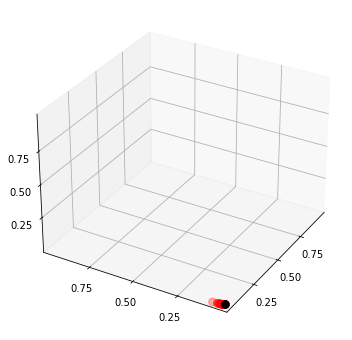

In [85]:
P = np.array(pos_array)

ψ = pos_array[1] #(0.0, 0.2, 0.8)        # Initial condition

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set(xlim=(0, 1), ylim=(0, 1), zlim=(0, 1),
       xticks=(0.25, 0.5, 0.75),
       yticks=(0.25, 0.5, 0.75),
       zticks=(0.25, 0.5, 0.75))

x_vals, y_vals, z_vals = [], [], []
for t in range(20):
    x_vals.append(ψ[0])
    y_vals.append(ψ[1])
    z_vals.append(ψ[2])
    ψ = ψ @ P

ax.scatter(x_vals, y_vals, z_vals, c='r', s=60)
ax.view_init(30, 210)

mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
ax.scatter(ψ_star[0], ψ_star[1], ψ_star[2], c='k', s=60)

plt.show()